In [1]:
%load_ext autoreload
%autoreload 

In [3]:
from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
import json

In [4]:
def print_config(name):

   with open('e:/Wind/Scripts/MultipleData/configsjm/'+ name + '.json') as json_file:
      data = json.load(json_file)
      pprint.pprint(data)

   return

In [5]:
# read and print .json file

### MLP Best

In [6]:
query = {"experiment": "JM_MLP_s2s_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [7]:
print_config('config_MLP_s2s')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


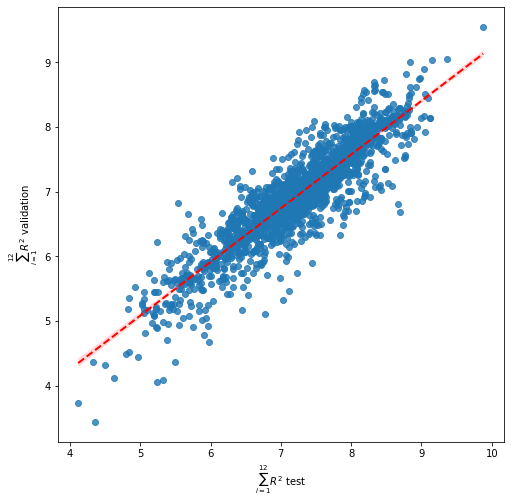

In [8]:
results.plot_densplot(plot='regression',glm=False, figsize=(8,8), save = 'MLP_best_densplot', saveformat='png' )

2000

MEAN (test)= 7.253844933539594
StDev (test)= 0.7921884840690845
MEAN (val)= 6.953885354741694
StDev (val)= 0.7320343946147413


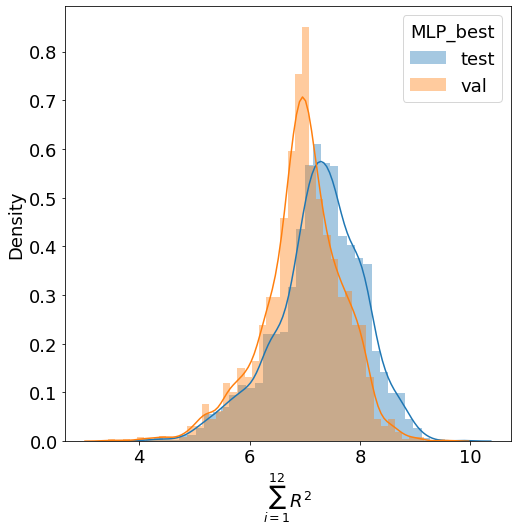

In [9]:
results.sample(1)
results.selected_size()
results.plot_distplot(seaborn=True, dset=('test', 'val'),figsize=(8,8), title='MLP_best', font=18, labels=['test','val'],saveformat='png', save='MLP_best_distplot')

### MLP future (temperature in future) low resolution weather input in future

In [24]:
query = {"experiment": "JM_MLP_s2s_fut","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [25]:
print_config('config_MLP_s2s_future')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s_fut'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'dmatrix': 'future',
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': [0, 1, 2, 3, 4, 5, 6],
          'varsf': [2]},
 'experiment': 'JM_MLP_s2s_fut',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.806734885214624
StDev (test)= 0.7846854959994536
MEAN (val)= 7.541478309526616
StDev (val)= 0.7491914881900474


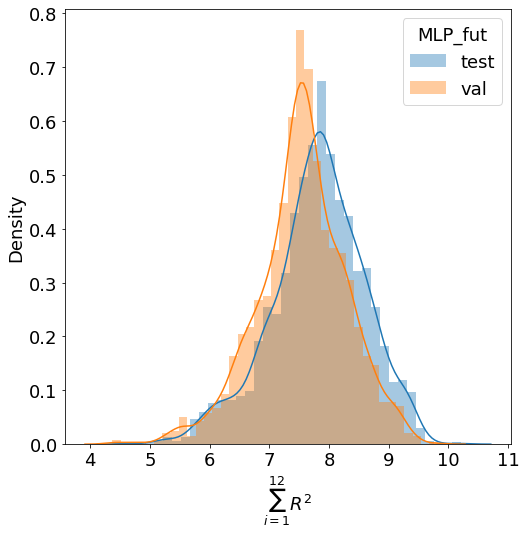

In [26]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP_fut', font=18, labels=['test','val'],save='MLP_fut_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.11391
Method:                          IRLS   Log-Likelihood:                -664.50
Date:                Sun, 02 Feb 2020   Deviance:                       227.59
Time:                        00:03:13   Pearson chi2:                     228.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6751      0.076      8.843      0.000       0.525       0.825
validation     0.9457      0.010     93.878      0.0

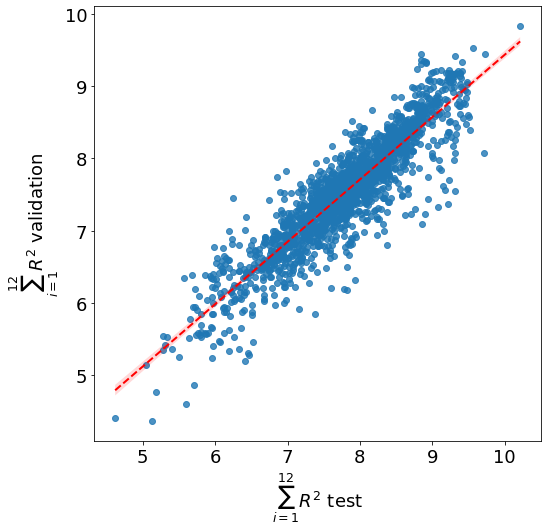

In [27]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8),save="MLP_fut_densplot", saveformat="png")

### MLP Cascade

In [20]:
query = {"experiment": "JM_MLP_cas_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [21]:
print_config('config_MLP_s2s_cas_best')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.3],
          'activation_full': ['leaky', 0.3],
          'batchnorm': True,
          'drop': 0.4,
          'full': [1024, 512, 512],
          'fulldrop': 0.5,
          'mode': 'MLP_s2s_cas'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.2504926159947605
StDev (test)= 0.8011011642044916
MEAN (val)= 6.928719753975598
StDev (val)= 0.7369461154955377


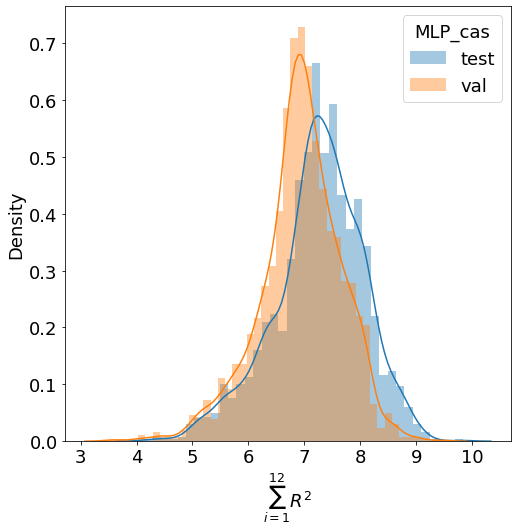

In [22]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP_cas', font=18, labels=['test','val'],save='MLP_cas_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12902
Method:                          IRLS   Log-Likelihood:                -789.12
Date:                Sat, 01 Feb 2020   Deviance:                       257.79
Time:                        23:59:57   Pearson chi2:                     258.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5173      0.076      6.812      0.000       0.368       0.666
validation     0.9718      0.011     89.163      0.0

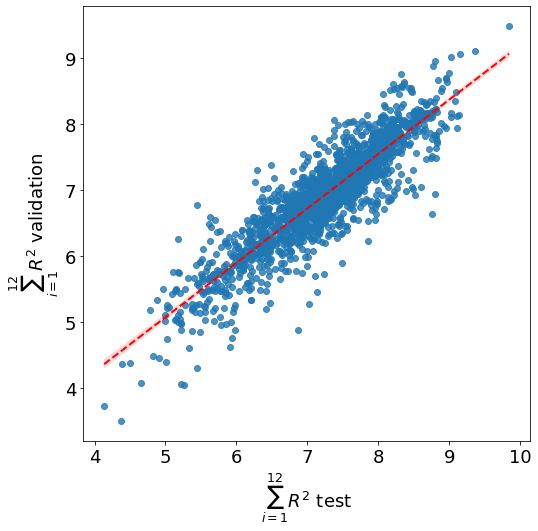

In [23]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_cas_densplot", saveformat="png")

### RNN best

In [ ]:
query = {"experiment": "JM_MLP_cas_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

In [28]:
print_config('config_RNN_s2s_JM')

{'_id': '00000000',
 'arch': {'CuDNN': False,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'LSTM'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 

In [ ]:
### RNN Attention

In [ ]:
query = {"experiment": "JM_MLP_cas_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

In [29]:
print_config('config_RNN_Att_s2s')

{'_id': '00000000',
 'arch': {'CuDNN': False,
          'activation': 'tanh',
          'activation_full': 'sigmoid',
          'activation_r': 'hard_sigmoid',
          'attsize': 16,
          'bidirectional': False,
          'bimerge': 'ave',
          'drop': 0.0,
          'full': [64, 32],
          'fulldrop': 0.05,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s_att',
          'neurons': 32,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 1,
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}
